In [ ]:
# Origin: Homework for Programming Week 4 - Least-squares
# Author: Augustin Dao
# Date created: 23/09/2016
# Last modified: 30/09/2016

In [7]:
install.packages("MASS", repos="http://cran.rstudio.com/")
install.packages("ggplot2", repos="http://cran.rstudio.com/") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘colorspace’, ‘Rcpp’, ‘RColorBrewer’, ‘dichromat’, ‘munsell’, ‘labeling’, ‘gtable’, ‘plyr’, ‘reshape2’, ‘scales’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


0.07958934
0.427887


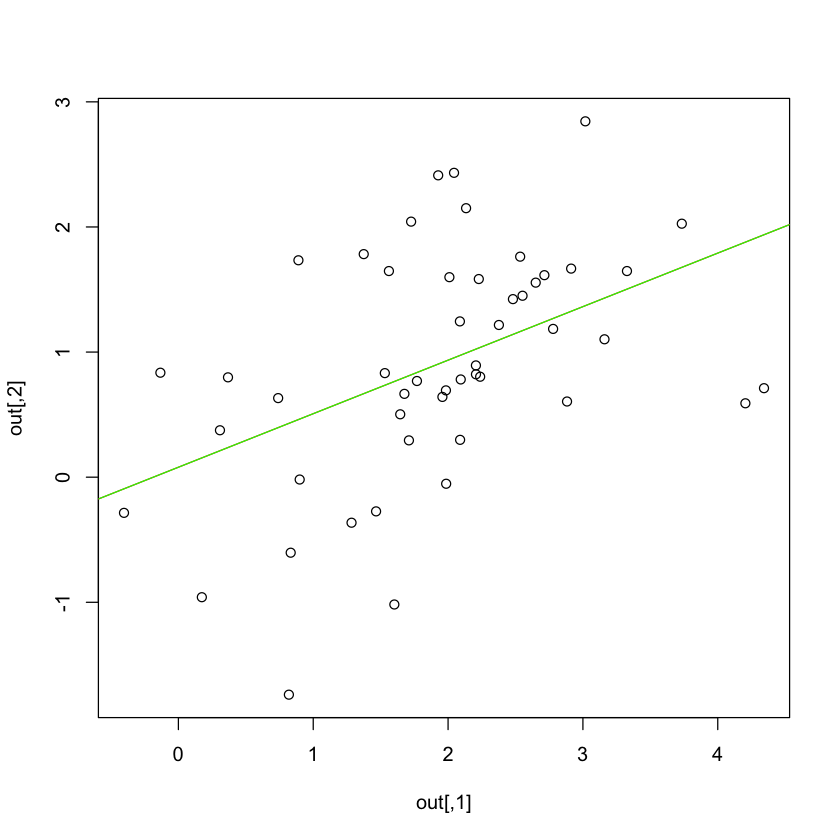

In [51]:
require(MASS)

#########

#1. Correct regression line to take into account intercept

# Set the correlation parameter and mean
beta = 0.5
SIGMA = matrix(c(1,beta,beta,1), ncol=2)
MU = c(2.0, 1.0)

# Set the sample size
N = 50

# Draw your sample
out <- mvrnorm(N, mu = MU, Sigma = SIGMA)
#out

# 1. Construct least square estimator

#split data into y and X
y <- out[, 2]
x <- out[, 1]
X <- matrix(rep (1, N), nrow = N , ncol = 2) #Add a column of 1 for intercept beta_0
X[,2] <- x
#X

#calculate beta using matrix
XT = t(X) #transpose of X
XTX = XT%*%X #dot product XT*X
invXTX = solve(XTX)
XTy = XT%*%y
beta = invXTX %*% XTy
beta

# Now add this line to the plot
plot(out)
abline(lm(out[,2]~out[,1]), col="red") #R-generated regression line (y~x)
abline(a=beta[1,], b=beta[2,], col="green") #corrected regression line with intercept b_0

In [53]:
# 2. Estimate beta for three-dimensional sample

require("ggplot2")
require(MASS)

#Set sampling parameters
beta_2 = 0.5
SIGMA_2 = matrix(c(1,beta_2,beta_2,beta_2,1,beta_2,beta_2,beta_2,1), ncol=3) #expand variance matrix
MU_2 = c(2.0, 1.0, 10.0)

# Set the sample size
N_2 = 50

# Draw sample
out_2 <- mvrnorm(N_2, mu = MU_2, Sigma = SIGMA_2)
#out_2

#Split data into dependent var. vector and explainatory var. matrix
y2 <- out_2[, 3]
x1_2 <- out_2[, 1]
x2_2 <- out_2[, 2]
X2 <- matrix(rep(1,N_2), nrow = N_2, ncol = 3)
X2[, 2] <- out_2[, 1]
X2[, 3] <- out_2[, 2]
#X2

#calculate beta using matrix
XT_2 = t(X2) #transpose of X2
XTX_2 = XT_2%*%X2 #dot product XT2*X2
invXTX2 = solve(XTX_2) #inverse matrix
XT_y2 = XT_2%*%y2
beta2 = invXTX2 %*% XT_y2
beta2

# Now add this line to the plot

# Still looking for how to make a 3d graph
#
#ggplot(x = x1_2, y = x2_2, z = y2)
#persp(x = x_2, y = y_2, z = z_2



8.368263
0.7542418
-0.097758


In [54]:
# 3.Write a function which takes an arbitrarily large vector of means, 
#   a correlation matrix, and a sample size, and outputs the estimated vector β 
#   and plots the sample with the least squares line 
#   (note: plotting this is going to be tricky for more than 3 dimensions, so don't worry about it).

#function outputs least square estimators
least_sq <- function(mu_x, var_matrix, N){ #check syntax for function defining
    
    N_var = length(mu_x) #check N-variables space
    
    # Draw sample
    require(MASS)
    data_out <- mvrnorm(N, mu = mu_x, Sigma = var_matrix) #draw data
    #data_out

    #Split data into dependent var. vector and explainatory var. matrix
    y_3 <- data_out[, N_var] #last column is dependent var by default
    X_3 <- matrix(rep(1, N), nrow = N, ncol = N_var) #rest are explainatory var. + first col. for constant

    for(i in 2:N_var){
        X_3[, i] <- data_out[, i-1]    
    } 

    #compute beta using matrix transforms
    XT_3 = t(X_3) #transpose of X_3
    XTX_3 = XT_3%*%X_3 #dot product
    invXTX_3 = solve(XTX_3) #inverse matrix
    XTy_3 = XT_3%*%y_3
    beta_f = invXTX_3 %*% XTy_3

    return(beta_f) #return estimated coeff vector
}

In [60]:
#Set sampling parameters

#We test the function with four dimension variable
MU_3 = c(-5.0, 4.0, 20.5, 2.34, 40.7, 45.7)
beta_3 = 0.5
#SIGMA_3 = matrix(c(1,beta_3,beta_3,beta_3, beta_3,1,beta_3,beta_3, beta_3, beta_3,1,beta_3, beta_3, beta_3, beta_3, 1), ncol= 4)

#populate variance matrix
SIGMA_3 <- matrix(rep(beta_3, length(MU_3)*length(MU_3)), nrow = length(MU_3), ncol = length(MU_3))
    for(i in 1:length(MU_3)){
        SIGMA_3[i,i] = 1.0 
    } 
SIGMA_3    

N_3 = 100

#Test function
least_sq(MU_3, SIGMA_3, N_3)

1.0,0.5,0.5,0.5,0.5,0.5
0.5,1.0,0.5,0.5,0.5,0.5
0.5,0.5,1.0,0.5,0.5,0.5
0.5,0.5,0.5,1.0,0.5,0.5
0.5,0.5,0.5,0.5,1.0,0.5
0.5,0.5,0.5,0.5,0.5,1.0


37.86924
0.1382849
0.2719194
-0.02236682
0.1096301
0.1893095
